In [41]:
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize 

In [42]:
data=pd.read_csv("../input/iris/Iris.csv")
data.drop("Id", axis=1, inplace = True)
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())

Describing the data:         SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null  

In [43]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


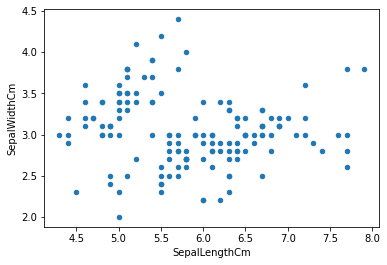

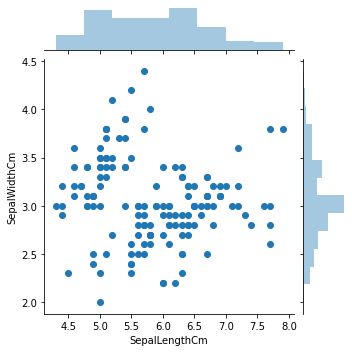

In [44]:
data.plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm') # use this to make a scatterplot of the Iris features.
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=data, size=5)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


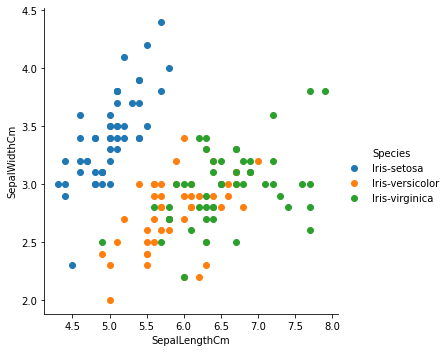

In [45]:
# use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(data, hue = 'Species', size=5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e64514150>,
      dtype=object)

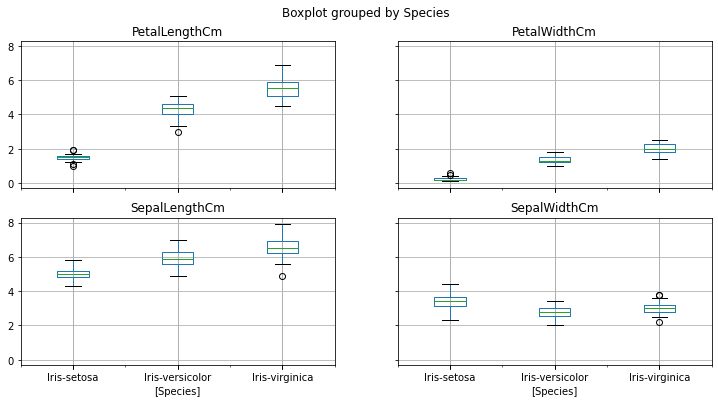

In [46]:
# make a boxplot with Pandas on each feature split out by species

data.boxplot(by='Species', figsize=(12,6))

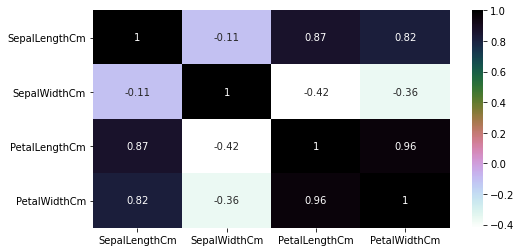

In [47]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

# Preprocessing dataset

In [48]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2       0
1            4.9           3.0            1.4           0.2       0
2            4.7           3.2            1.3           0.2       0
3            4.6           3.1            1.5           0.2       0
4            5.0           3.6            1.4           0.2       0


In [49]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())
X=data.iloc[:,0:4].values
Y=data.iloc[:,4]
print("Shape of X",X.shape)
print("Shape of Y",Y.shape)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
18             5.7           3.8            1.7           0.3       0
110            6.5           3.2            5.1           2.0       2
123            6.3           2.7            4.9           1.8       2
55             5.7           2.8            4.5           1.3       1
88             5.6           3.0            4.1           1.3       1
Shape of X (150, 4)
Shape of Y (150,)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris_data = datasets.load_iris()
X = iris_data.data 
Y = iris_data.target

test_ratio = 0.3
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=test_ratio,random_state=seed)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [77]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

# Finding the best fit parameters for the neural networks

I take 15 different tuples of parameters (learning rate, number of nodes in hidden layer) and get 2-fold cross validation score for each tuple by training the Multi-Layered Perceptron with randomly initialised weights 20 times.

In [102]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

splits = 2
tolerance = 1e-5
limit = 50000
iters = 20

def getCrossValidationScore(learning_rate, num_hidden_nodes):
    
    kfold = KFold(n_splits=splits,random_state=seed,shuffle=True)
    mlp = MLPClassifier(hidden_layer_sizes=(num_hidden_nodes,),learning_rate_init=learning_rate,tol=tolerance,max_iter=limit)
    
    scores = []
    
    for train_index, test_index in kfold.split(X_train):
        
        X_train_cur = X_train[train_index]
        X_test_cur = X_train[test_index]
        y_train_cur = y_train[train_index]
        y_test_cur = y_train[test_index]
        
        mlp.fit(X_train_cur,y_train_cur)
        scores.append(mlp.score(X_test_cur,y_test_cur))
        
    return np.mean(scores)

def getListOfScores(learning_rate, num_hidden_nodes):
    
    scores = []
    for _ in range(iters): 
        scores.append(getCrossValidationScore(learning_rate,num_hidden_nodes))
    return scores

In [103]:
num_hidden_layers = [20,30,50]
learning_rates = [0.001,0.01,0.05,0.1,0.5]

parameters = []
scores = []

for num_hidden_nodes in num_hidden_layers:
    for learning_rate in learning_rates:
        score = getListOfScores(learning_rate,num_hidden_nodes)
        print('Learning Rate : ',learning_rate,'\tHidden Nodes : ',num_hidden_nodes,'\tScore : ',np.mean(score))
        scores.append(score)
        parameters.append((learning_rate,num_hidden_nodes))

Learning Rate :  0.001 	Hidden Nodes :  20 	Score :  0.9073476052249638
Learning Rate :  0.01 	Hidden Nodes :  20 	Score :  0.9016146589259797
Learning Rate :  0.05 	Hidden Nodes :  20 	Score :  0.8945301161103048
Learning Rate :  0.1 	Hidden Nodes :  20 	Score :  0.8978682873730046
Learning Rate :  0.5 	Hidden Nodes :  20 	Score :  0.9049074746008708
Learning Rate :  0.001 	Hidden Nodes :  30 	Score :  0.9049256168359943
Learning Rate :  0.01 	Hidden Nodes :  30 	Score :  0.8992470972423803
Learning Rate :  0.05 	Hidden Nodes :  30 	Score :  0.8926161103047896
Learning Rate :  0.1 	Hidden Nodes :  30 	Score :  0.8997913642960812
Learning Rate :  0.5 	Hidden Nodes :  30 	Score :  0.8882982583454282
Learning Rate :  0.001 	Hidden Nodes :  50 	Score :  0.908744557329463
Learning Rate :  0.01 	Hidden Nodes :  50 	Score :  0.9035649492017417
Learning Rate :  0.05 	Hidden Nodes :  50 	Score :  0.9007710449927432
Learning Rate :  0.1 	Hidden Nodes :  50 	Score :  0.897396589259797
Learning R

# Boxplot Analysis to find the best fit parameters

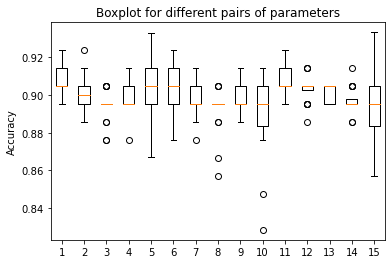

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

data = []

for score in scores:
    data.append(np.array(score))

fig, ax = plt.subplots()
ax.set_title('Boxplot for different pairs of parameters')
plt.ylabel('Accuracy')
ax.boxplot(data)

plt.show()

As we can observe in the box plots, outliers in case of $5^{th}$ tuple of parameters has no outlier, produces the highest mean accuracy and has relatively less quartile distance. Thus, it should be chosen as the best fit parameter tuple.

In [105]:
best_learning_rate, best_num_hidden_nodes = parameters[4]

# Final Model Analysis

## Training with the best fit parameters

In [106]:
mlp = MLPClassifier(hidden_layer_sizes=(best_num_hidden_nodes,),learning_rate_init=best_learning_rate,tol=tolerance,max_iter=limit)

mlp.fit(X_train,y_train)
y_pred = mlp.predict_proba(X_test)
print('Test Accuracy = ', mlp.score(X_test,y_test))

Test Accuracy =  0.9555555555555556


Final model has an accuracy of 95.55 % on the held-out test data

## CMC Curve

In [107]:
y_preds = []

for i in range(y_pred.shape[0]):
    ids = y_pred[i].argsort()[::-1]
    y_preds.append(ids)
    
y_preds = np.array(y_preds)

In [109]:
ranks = np.zeros(4)

for i in range(y_test.shape[0]) :
    if y_test[i] in y_preds[i] :
        firstOccurance = np.argmax(y_preds[i]==y_test[i])        
        for j in range(firstOccurance, 4) :            
            ranks[j] +=1
            
cmc_scores = [float(i)/float(y_test.shape[0]) for i in ranks]
cmc_scores

[0.9555555555555556, 1.0, 1.0, 1.0]

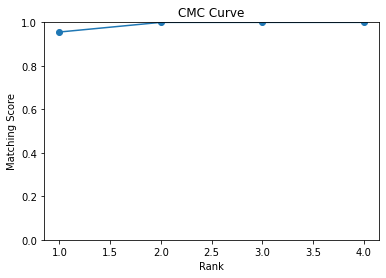

In [110]:
fig, ax = plt.subplots()

plot_x = np.arange(1,5)

ax.set_title('CMC Curve')
plt.xlabel('Rank')
plt.ylabel('Matching Score')
plt.ylim(0,1)
ax.plot(plot_x,cmc_scores,marker='o')

plt.show()

The model has considerably higher top-3 accuracy as can be seen from the CMC Curve